# Kaggle Project

### Felix Hammond

### Part I: Descriptive Analysis

#### Section A
(a)

In [1]:
import pandas as pd

# import training dataset
training_data = pd.read_excel("training_data.xlsx")

In [2]:
# calculate tweet length in characters and words
training_data['tweet_length_chars'] = training_data['full_text'].str.len()
training_data['tweet_length_words'] = training_data['full_text'].str.split().str.len()

# calculate hashtag length in characters and words
training_data['hashtag_length_chars'] = training_data['hashtags'].fillna("").str.len()
training_data['hashtag_length_words'] = training_data['hashtags'].fillna("").str.split().str.len()

# summary table
summary_table = {
    "Metric": ["Tweet Length (# Characters)", "Tweet Length (# Words)", "Hashtag Length (# Characters)", "Hashtag Length (# Words)"],
    "Minimum": [training_data['tweet_length_chars'].min(), training_data['tweet_length_words'].min(),
                training_data['hashtag_length_chars'].min(), training_data['hashtag_length_words'].min()],
    "Average": [training_data['tweet_length_chars'].mean(), training_data['tweet_length_words'].mean(),
                training_data['hashtag_length_chars'].mean(), training_data['hashtag_length_words'].mean()],
    "Median": [training_data['tweet_length_chars'].median(), training_data['tweet_length_words'].median(),
               training_data['hashtag_length_chars'].median(), training_data['hashtag_length_words'].median()],
    "Maximum": [training_data['tweet_length_chars'].max(), training_data['tweet_length_words'].max(),
                training_data['hashtag_length_chars'].max(), training_data['hashtag_length_words'].max()]}

# convert summary table to DataFrame for easy display
summary_df = pd.DataFrame(summary_table)

print(summary_df)

                          Metric  Minimum     Average  Median  Maximum
0    Tweet Length (# Characters)        4  167.304121   156.0     2994
1         Tweet Length (# Words)        1   20.141102    19.0       89
2  Hashtag Length (# Characters)        0    4.395594     0.0      145
3       Hashtag Length (# Words)        0    0.492197     0.0       16


(b)

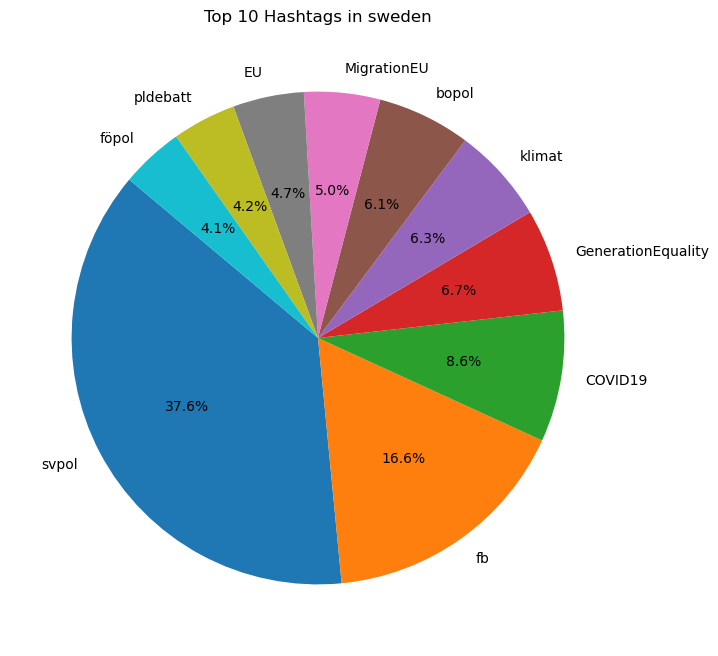

Top 10 hashtags in sweden:
svpol: 1599
fb: 707
COVID19: 366
GenerationEquality: 286
klimat: 267
bopol: 260
MigrationEU: 212
EU: 198
pldebatt: 178
föpol: 175




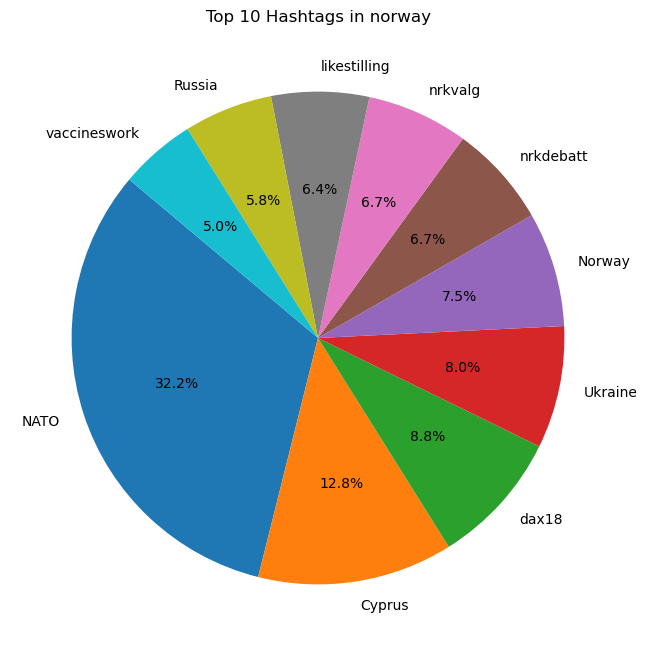

Top 10 hashtags in norway:
NATO: 779
Cyprus: 310
dax18: 214
Ukraine: 194
Norway: 182
nrkdebatt: 162
nrkvalg: 161
likestilling: 155
Russia: 141
vaccineswork: 121




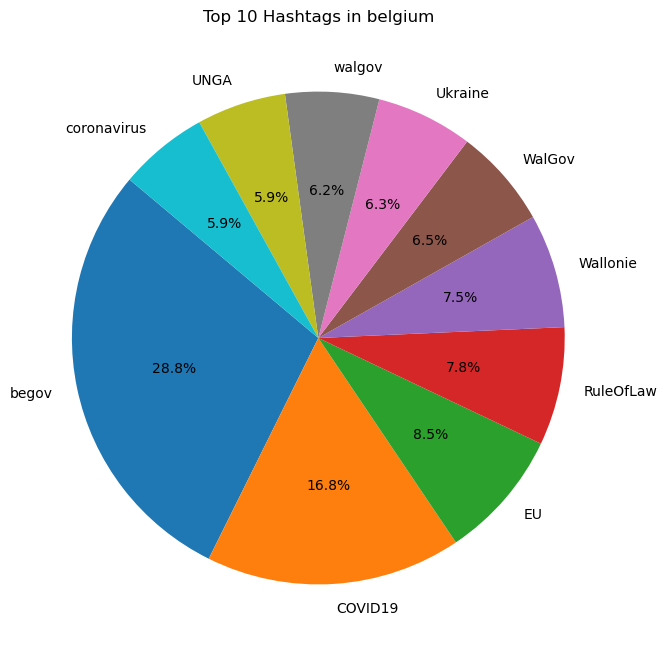

Top 10 hashtags in belgium:
begov: 1291
COVID19: 752
EU: 382
RuleOfLaw: 348
Wallonie: 335
WalGov: 292
Ukraine: 284
walgov: 276
UNGA: 263
coronavirus: 263




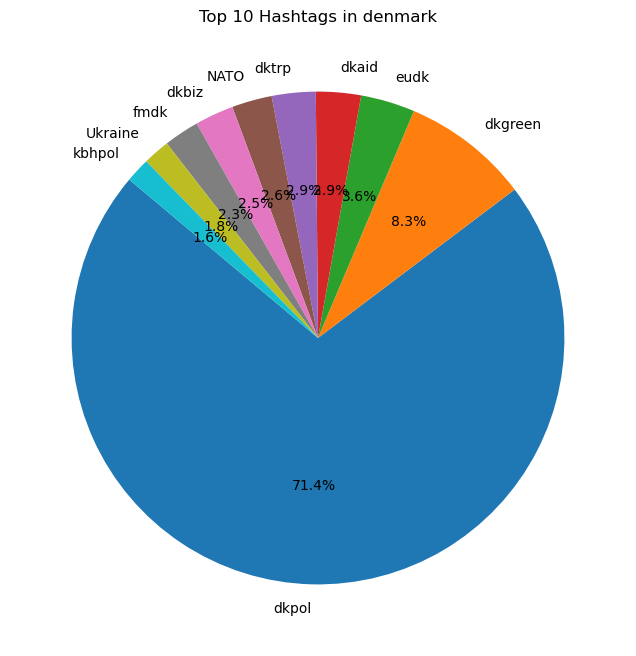

Top 10 hashtags in denmark:
dkpol: 16090
dkgreen: 1880
eudk: 802
dkaid: 664
dktrp: 648
NATO: 594
dkbiz: 573
fmdk: 523
Ukraine: 397
kbhpol: 363




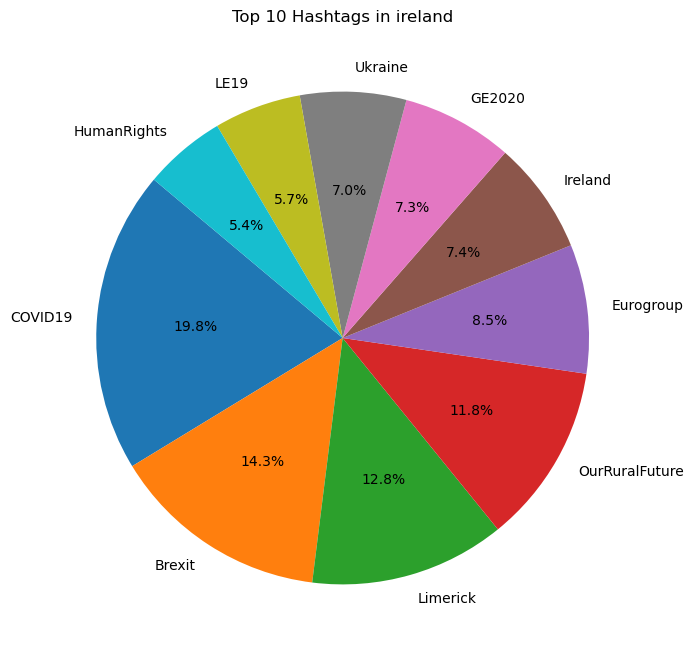

Top 10 hashtags in ireland:
COVID19: 541
Brexit: 391
Limerick: 350
OurRuralFuture: 323
Eurogroup: 231
Ireland: 202
GE2020: 199
Ukraine: 190
LE19: 156
HumanRights: 147




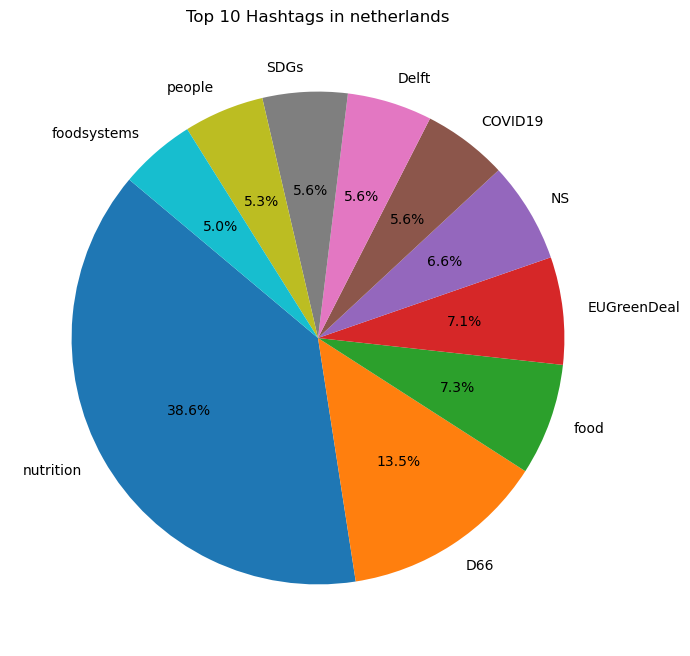

Top 10 hashtags in netherlands:
nutrition: 782
D66: 273
food: 149
EUGreenDeal: 143
NS: 134
COVID19: 113
Delft: 113
SDGs: 113
people: 107
foodsystems: 101




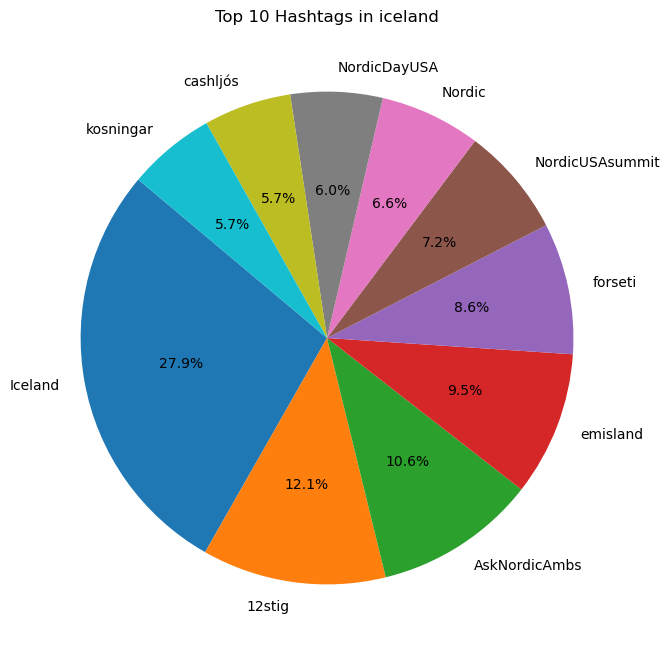

Top 10 hashtags in iceland:
Iceland: 97
12stig: 42
AskNordicAmbs: 37
emisland: 33
forseti: 30
NordicUSAsummit: 25
Nordic: 23
NordicDayUSA: 21
cashljós: 20
kosningar: 20




In [3]:
import matplotlib.pyplot as plt
from collections import Counter

# ensure hashtags are treated as strings and split into lists
training_data['hashtags_list'] = training_data['hashtags'].fillna("").str.split()

# function to calculate top 10 hashtags for a given country
def top_hashtags_by_country(country_name):
    hashtags = training_data[training_data['country_user'] == country_name]['hashtags_list'].sum()
    hashtag_counts = Counter(hashtags)
    return hashtag_counts.most_common(10)

# get the unique countries
countries = training_data['country_user'].unique()

# create pie charts
for country in countries:
    top_hashtags = top_hashtags_by_country(country)
    labels, counts = zip(*top_hashtags)

    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f"Top 10 Hashtags in {country}")
    plt.savefig(f"top_10_hashtags_{country}.png")
    plt.show()

    print(f"Top 10 hashtags in {country}:")
    for hashtag, count in top_hashtags:
        print(f"{hashtag}: {count}")
    print("\n")

(c)

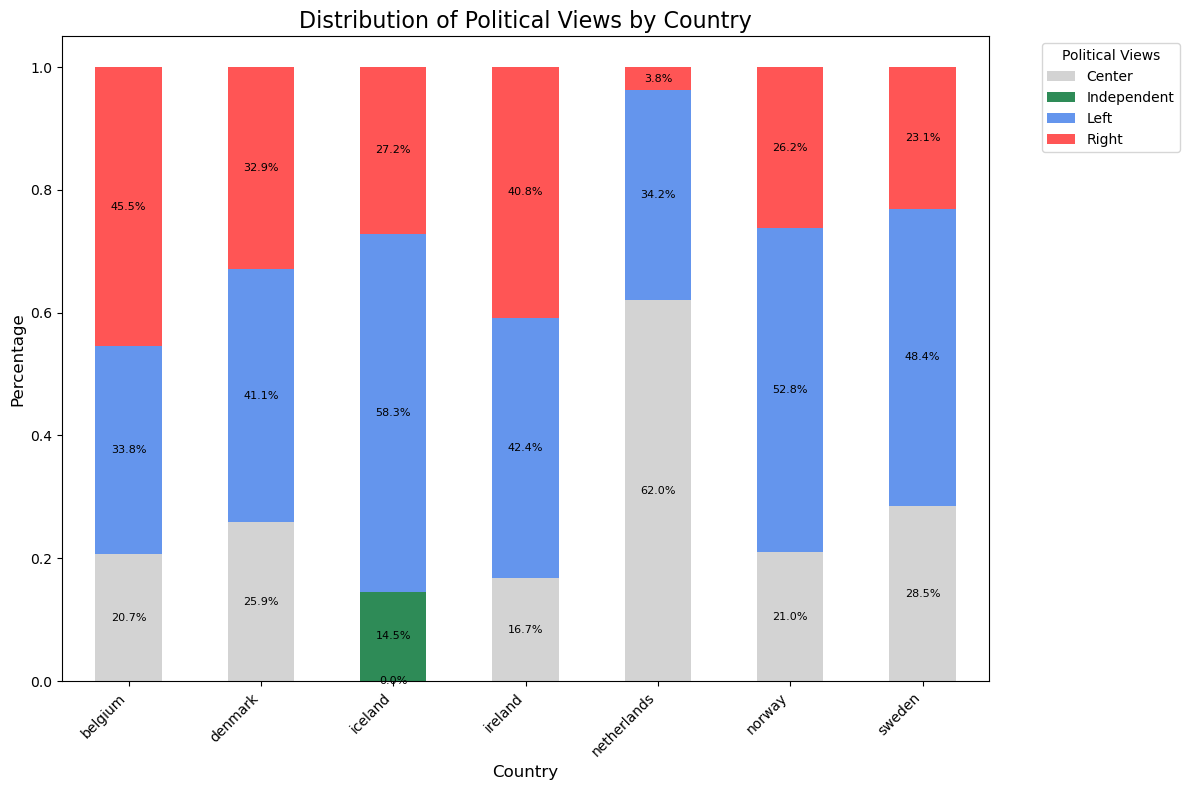

In [4]:
# group data by country and political view
country_politics = training_data.groupby(['country_user', 'pol_spec_user']).size().unstack(fill_value=0)

# normalize the data to percentages (for each country)
normalized_politics = country_politics.div(country_politics.sum(axis=1), axis=0)

# plot the stacked bar chart
ax = normalized_politics.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightgray', 'seagreen', 'cornflowerblue', '#FF5555'])

# add labels and title
plt.title("Distribution of Political Views by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Political Views", bbox_to_anchor=(1.05, 1), loc='upper left')

# display the percentages on the bars
for i, bar in enumerate(ax.patches):
    if bar.get_height() > 0:  # Only label non-zero values
        height = bar.get_height()
        ax.text(
            x=bar.get_x() + bar.get_width() / 2, 
            y=bar.get_y() + height / 2, 
            s=f"{height:.1%}",  # Format as percentage
            ha="center", 
            va="center",
            fontsize=8
        )

plt.tight_layout()
plt.savefig("political_views_by_country.png")
plt.show()

(d)

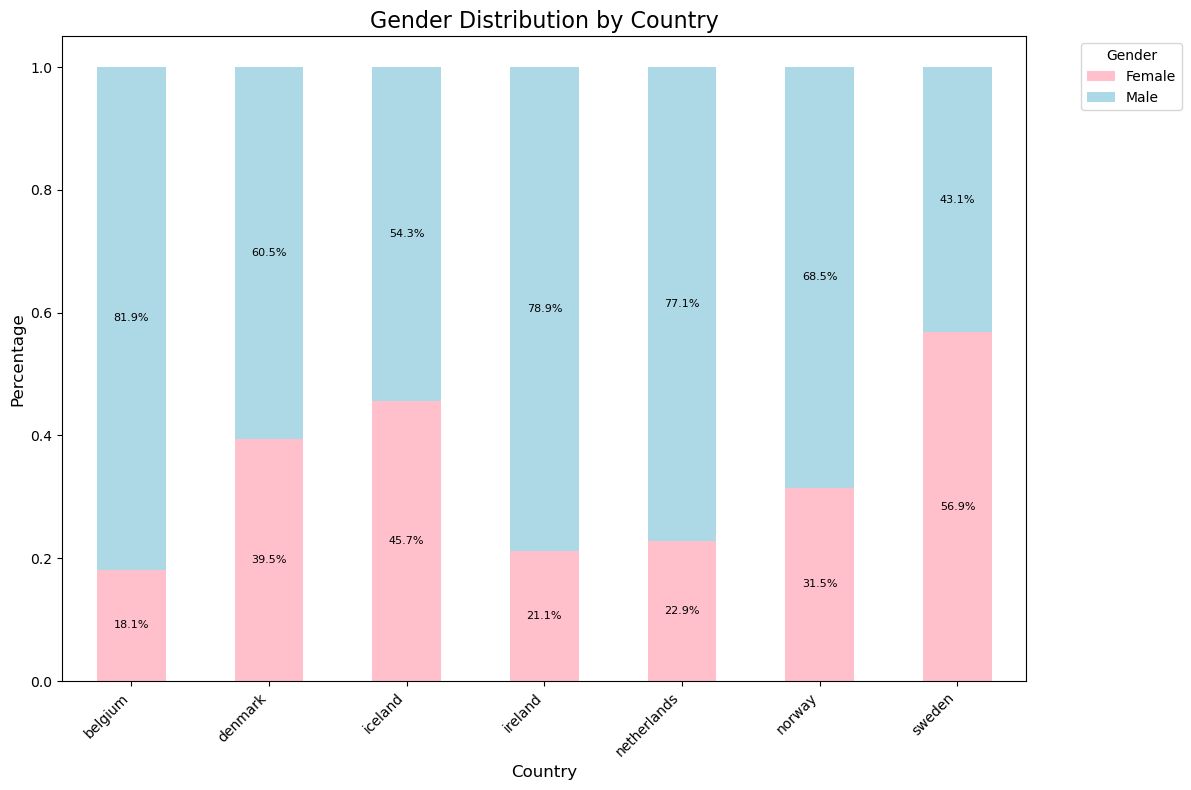

In [5]:
# group data by country and gender
country_gender = training_data.groupby(['country_user', 'gender_user']).size().unstack(fill_value=0)

# normalize the data to percentages (for each country)
normalized_gender = country_gender.div(country_gender.sum(axis=1), axis=0)

# plot the stacked bar chart
ax = normalized_gender.plot(kind='bar', stacked=True, figsize=(12, 8), color=['pink','lightblue'])

# add labels and title
plt.title("Gender Distribution by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')

# display the percentages on the bars
for i, bar in enumerate(ax.patches):
    if bar.get_height() > 0:  # Only label non-zero values
        height = bar.get_height()
        ax.text(
            x=bar.get_x() + bar.get_width() / 2, 
            y=bar.get_y() + height / 2, 
            s=f"{height:.1%}",  # Format as percentage
            ha="center", 
            va="center",
            fontsize=8
        )

plt.tight_layout()
plt.savefig("gender_distribution_by_country.png")
plt.show()

#### Section B

(a)

In [6]:
# import the function from lemmatizer.py
from lemmatizer import lemmatize_tweet

# apply the cleaning function to the 'full_text' column
training_data['text_clean'] = training_data['full_text'].apply(lemmatize_tweet)

# calculate statistics for the cleaned text
training_data['text_clean_length_chars'] = training_data['text_clean'].str.len() # character length
training_data['text_clean_length_words'] = training_data['text_clean'].str.split().apply(len) # word length

ModuleNotFoundError: No module named 'lemmatizer'

In [ ]:
# summary table for the cleaned text
summary_clean_table = {
    "Metric": ["Cleaned Text Length (# Characters)", "Cleaned Text Length (# Words)"],
    "Minimum": [training_data['text_clean_length_chars'].min(), training_data['text_clean_length_words'].min()],
    "Average": [training_data['text_clean_length_chars'].mean(), training_data['text_clean_length_words'].mean()],
    "Median": [training_data['text_clean_length_chars'].median(), training_data['text_clean_length_words'].median()],
    "Maximum": [training_data['text_clean_length_chars'].max(), training_data['text_clean_length_words'].max()]}

# convert summary table to DataFrame for easy display
summary_clean_df = pd.DataFrame(summary_clean_table)
summary_df = pd.concat([summary_df, summary_clean_df], ignore_index=True)

print(summary_df)

(b)

In [ ]:
import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.preprocessing import normalize

# create a TfidfVectorizer to convert the cleaned tweets into a TF-IDF matrix
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words=['english','sedish','norwegian','dutch','danish'], max_df=0.95, min_df=2)
tfidf_matrix = vectorizer.fit_transform(training_data['text_clean'])

# LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda.fit_transform(tfidf_matrix)

# NMF
nmf = NMF(n_components=10, random_state=42)
nmf_topics = nmf.fit_transform(tfidf_matrix)

# function to print top words for each topic
def print_top_words(model, vectorizer, n_top_words=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        top_words_idx = topic.argsort()[: -n_top_words - 1: -1]
        top_words = feature_names[top_words_idx]
        print(" ".join(top_words))
        print()

print("LDA Topics:")
print_top_words(lda, vectorizer)

print("NMF Topics:")
print_top_words(nmf, vectorizer)

### Part II: Model Creation and Prediction

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

training_data[['sentiment_polarity', 'sentiment_subjectivity']] = training_data['text_clean'].apply(lambda x: pd.Series(get_sentiment(x)))

#### Feature Engineering and Splitting Data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation


# Sentiment Features (Already Included)
sentiment = csr_matrix(training_data[['sentiment_polarity', 'sentiment_subjectivity', 'tweet_length_chars', 
                                      'tweet_length_words', 'hashtag_length_chars', 'hashtag_length_words', 
                                      'text_clean_length_chars', 'text_clean_length_words']])

# Normalize Sentiment Features
sentiment_dense = sentiment.toarray()  # Convert to dense format for scaling
scaler = MinMaxScaler()
sentiment_normalized = scaler.fit_transform(sentiment_dense)
sentiment = csr_matrix(sentiment_normalized)  # Convert back to sparse matrix

# Text Features (text_clean and full_text)
# TF-IDF for 'text_clean'
text_clean_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words=['english','swedish','norwegian','dutch','danish'], max_df=0.1, min_df=2)
text_clean_features = text_clean_vectorizer.fit_transform(training_data['text_clean'])


# TF-IDF for 'full_text'
training_data['full_text'] = training_data['full_text'].fillna('')  # Replace NaN with an empty string
full_text_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=2)
full_text_features = full_text_vectorizer.fit_transform(training_data['full_text'])

# Hashtag Features
training_data['hashtags'] = training_data['hashtags'].fillna('')  # Replace NaN
hashtag_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_df=0.9, min_df=2)
hashtag_features = hashtag_vectorizer.fit_transform(training_data['hashtags'])

# in_reply_to_screen_name Features
training_data['in_reply_to_screen_name'] = training_data['in_reply_to_screen_name'].fillna('missing')

reply_vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english', max_df=0.9, min_df=2)
reply_features = reply_vectorizer.fit_transform(training_data['in_reply_to_screen_name'])

# Categorical Features (country_user and gender_user)
categorical_encoder = OneHotEncoder(drop='first')
categorical_features = categorical_encoder.fit_transform(training_data[['country_user', 'gender_user']])

# Combine All Features
X = hstack([text_clean_features, full_text_features, hashtag_features, sentiment, categorical_features, reply_features])

# Define Target Variable
y = training_data['pol_spec_user']  # Target variable

# Print shapes for verification
print(f"Text Clean Features Shape: {text_clean_features.shape}")
print(f"Full Text Features Shape: {full_text_features.shape}")
print(f"Hashtag Features Shape: {hashtag_features.shape}")
print(f"Sentiment Features Shape: {sentiment.shape}")
print(f"Categorical Features Shape: {categorical_features.shape}")
print(f"Reply Features Shape: {reply_features.shape}")
print(f"Combined Features Shape: {X.shape}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

model = LogisticRegression(verbose=0,solver='liblinear', penalty='l2', max_iter=1000, C=10)  # Use 1000 iterations to ensure convergence
model.fit(X_train, y_train)

# predict on the test set
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)  # Adjust `labels` as needed

# display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
test_data = pd.read_excel('test_data.xlsx')

In [ ]:
test_data['text_clean'] = test_data['full_text'].apply(lemmatize_tweet)

In [ ]:
test_data['tweet_length_chars'] = test_data['full_text'].str.len()
test_data['tweet_length_words'] = test_data['full_text'].str.split().str.len()

# calculate hashtag length in characters and words
test_data['hashtag_length_chars'] = test_data['hashtags'].fillna("").str.len()
test_data['hashtag_length_words'] = test_data['hashtags'].fillna("").str.split().str.len()

test_data['text_clean_length_chars'] = test_data['text_clean'].str.len() # character length
test_data['text_clean_length_words'] = test_data['text_clean'].str.split().apply(len) # word length

test_data[['sentiment_polarity', 'sentiment_subjectivity']] = test_data['text_clean'].apply(lambda x: pd.Series(get_sentiment(x)))

sentiment_test = csr_matrix(test_data[['sentiment_polarity', 'sentiment_subjectivity', 'tweet_length_chars', 'tweet_length_words',
                                     'hashtag_length_chars', 'hashtag_length_words', 'text_clean_length_chars', 'text_clean_length_words']])

from sklearn.preprocessing import MinMaxScaler

# Convert sentiment to dense format to apply scaler
sentiment_dense = sentiment_test.toarray()

# Apply Min-Max Scaler
scaler = MinMaxScaler()
sentiment_normalized = scaler.fit_transform(sentiment_dense)

# Convert back to sparse matrix if needed
sentiment_test = csr_matrix(sentiment_normalized)

text_features_test = vectorizer.transform(test_data['text_clean'])

# TF-IDF for 'full_text'
full_text_features = full_text_vectorizer.transform(test_data['full_text'])

# Replace NaN with an empty string
test_data['hashtags'] = test_data['hashtags'].fillna('')

hashtag_features_test = hashtag_vectorizer.transform(test_data['hashtags'])

# Apply One-Hot Encoding
test_data['in_reply_to_screen_name'] = test_data['in_reply_to_screen_name'].fillna('')
reply_features = reply_vectorizer.transform(test_data['in_reply_to_screen_name'])

# One-Hot Encode Categorical Features
categorical_features_test = categorical_encoder.transform(test_data[['country_user', 'gender_user']])
test_features = hstack([text_features_test, full_text_features, 
                        hashtag_features_test, sentiment_test, categorical_features_test, reply_features])

In [ ]:
test_predictions = model.predict(test_features)

In [ ]:
submission_df = pd.DataFrame({
    'ID': test_data['Id'],  # Ensure 'Id' is in the test set
    'pol_spec_user': test_predictions  # Predicted political views
})

submission_df.to_csv('submission.csv', index=False)

print("Submission file created: 'submission.csv'")